<a href="https://colab.research.google.com/github/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/blob/main/Analise_Exploratoria_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SUICÍDIOS NO BRASIL: ANÁLISE EXPLORATÓRIA DE DADOS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')


In [2]:
#Aqauisição dos dados
df = pd.read_csv('https://raw.githubusercontent.com/Luis-Hauck/Analise_Exploratoria_Suicidios_no_Brasil/main/master.csv')

In [3]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#Verificamos a estrutura do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#Verificamos alguns dados
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
#verificamos Valores Duplicados
df.duplicated().sum()

0

In [7]:
#Verificamso valores nulos
df.isnull().sum()

,0
country,0
year,0
sex,0
age,0
suicides_no,0
population,0
suicides/100k pop,0
country-year,0
HDI for year,19456
gdp_for_year ($),0


##Números de Suícios por Ano

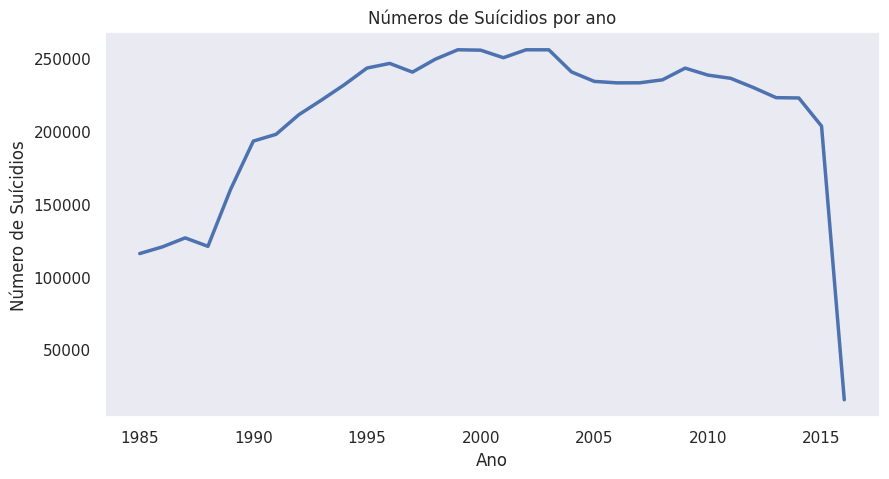

In [8]:
#Agrupamos os números de suícidios por anos
num_suic = df.groupby('year')['suicides_no'].sum()
#Criamos o gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = num_suic.index, y = num_suic.values, linewidth=2.5 )
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Números de Suícidios por ano')
plt.show()

##Dados ausentes ou outlier no número de suícidios

Podemos perceber que ocorreu uma grande queda no ano de 2015 para 2016, podendo ser uma falta de dados desse período ou realmente uma queda no número de suícidios, por conta disso tomei a decisão de retirar os valores desse ano para nossa análise.

In [9]:
df2 = df[df['year'] != 2016]

In [10]:
df2.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27660.000000,27660.000000,2.766000e+04,27660.000000,8364.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,0.776601,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,0.093367,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,0.713000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,0.779000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,0.855000,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


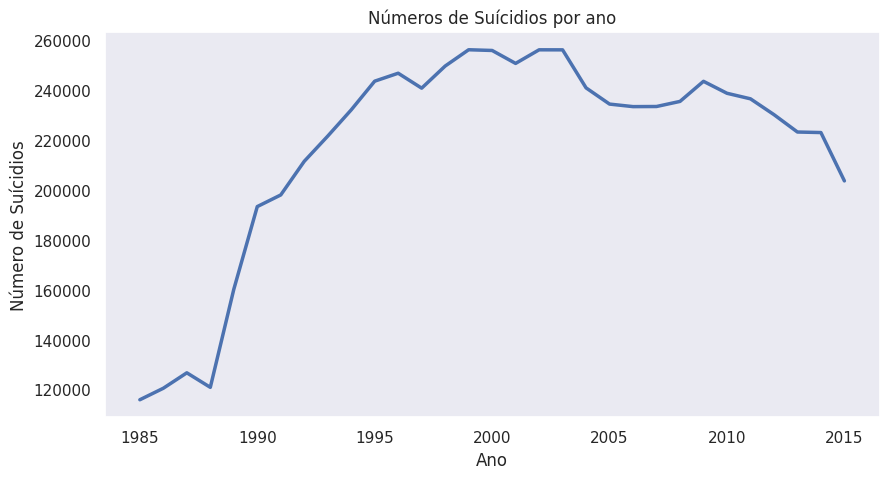

In [11]:
#Agrupamos os números de suícidios por anos
num_suic = df2.groupby('year')['suicides_no'].sum()
#Criamos o gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x = num_suic.index, y = num_suic.values, linewidth=2.5 )
plt.xlabel('Ano')
plt.ylabel('Número de Suícidios')
plt.title('Números de Suícidios por ano')
plt.show()

##Países com maiores numeros de Suícidios entre 1985-2015

In [12]:
#Agruapamos o número de suícidios por pais
total_suicidios = df2.groupby('country')['suicides_no'].sum().reset_index().sort_values(by = 'suicides_no', ascending=False).head(10)

In [13]:
total_suicidios

,country,suicides_no
74,Russian Federation,1209742
97,United States,1034013
46,Japan,806902
33,France,329127
94,Ukraine,319950
35,Germany,291262
72,Republic of Korea,261730
15,Brazil,226613
68,Poland,139098
96,United Kingdom,136805


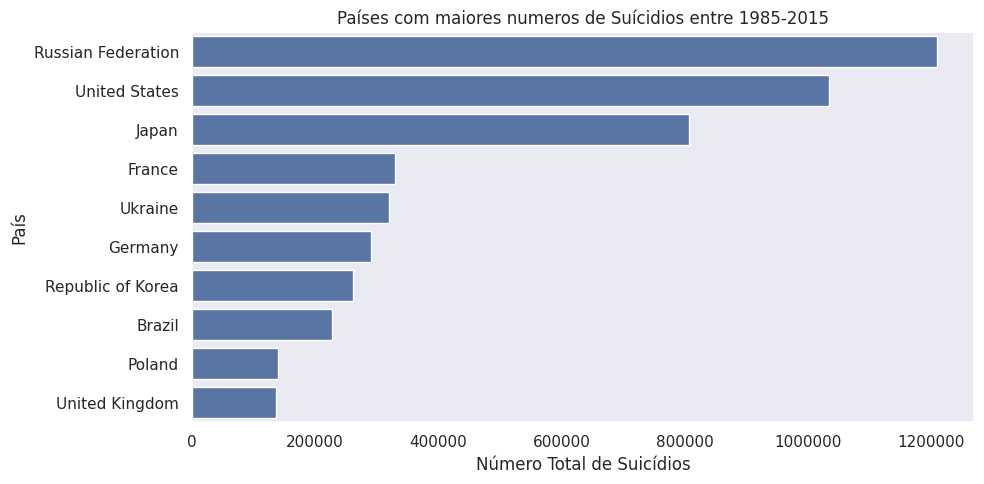

In [14]:
#Criamos os Gráfico
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(y = total_suicidios['country'], x = total_suicidios['suicides_no'])
plt.xlabel('Número Total de Suicídios')
plt.ylabel('País')
plt.title('Países com maiores numeros de Suícidios entre 1985-2015')
ax.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

## Tendência de Suícidio por geração da População


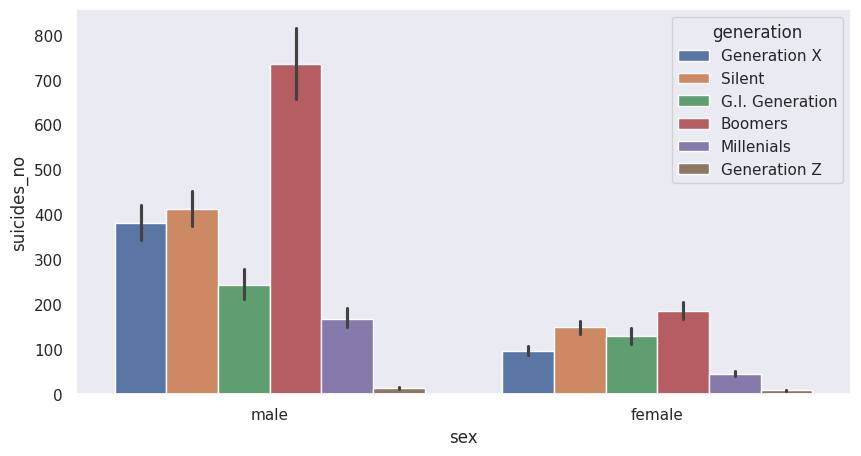

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sex', y='suicides_no', hue='generation', data = df2)
plt.show()